# 리그오브레전드 마스터랭크게임 첫 15분 데이터를 이용한 승리예측

## 데이터 설명

In [85]:
import pandas as pd

df = pd.read_csv('./lolmaster.csv')

데이터의 특성은 수집과정에서 들어간 Unamed를 제외한 각 팀의 경험치, 획득골드, 미니언 처치 수, 정글 몬스터 처치 수, 라인별 획득 골드, 라인별 획득 경험치등

In [4]:
# 라인별 획득 골드, 획득 경험치가 없는경우를 실험하기 위해 해당 column들을 모두 drop
df.info()
df = df.drop(['blueTopGold', 'blueMidGold', 'blueJugGold', 'blueSupGold', 'blueAdGold', 
              'redTopGold', 'redMidGold', 'redJugGold', 'redSupGold', 'redAdGold',
              'blueTopXp', 'blueMidXp', 'blueJugXp', 'blueSupXp', 'blueAdXp',
              'redTopXp', 'redMidXp', 'redJugXp', 'redSupXp', 'redAdXp',
              'gameId'
             ], axis=1)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64982 entries, 0 to 64981
Data columns (total 72 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Unnamed: 0                  64982 non-null  int64  
 1   gameId                      64982 non-null  int64  
 2   blueWins                    64982 non-null  int64  
 3   blueTotalGolds              64982 non-null  int64  
 4   blueCurrentGolds            64982 non-null  int64  
 5   blueTotalLevel              64982 non-null  int64  
 6   blueAvgLevel                64982 non-null  float64
 7   blueTotalMinionKills        64982 non-null  int64  
 8   blueTotalJungleMinionKills  64982 non-null  int64  
 9   blueFirstBlood              64982 non-null  int64  
 10  blueKill                    64982 non-null  int64  
 11  blueDeath                   64982 non-null  int64  
 12  blueAssist                  64982 non-null  int64  
 13  blueWardPlaced              649

In [5]:
df.head(5)

,Unnamed: 0,blueWins,blueTotalGolds,blueCurrentGolds,blueTotalLevel,blueAvgLevel,blueTotalMinionKills,blueTotalJungleMinionKills,blueFirstBlood,blueKill,...,redFirstTowerLane,redTowerKills,redMidTowerKills,redTopTowerKills,redBotTowerKills,redInhibitor,redFirstDragon,redDragnoType,redDragon,redRiftHeralds
0,0,0,23613,2713,42,8.4,398,101,1,1,...,[],1,0,1,0,0,1,['AIR_DRAGON'],1,0
1,0,0,23800,5315,45,9.0,417,78,0,4,...,[],0,0,0,0,0,1,['AIR_DRAGON'],1,0
2,0,1,25353,1933,45,9.0,333,90,0,12,...,['TOP_LANE'],1,0,1,0,0,0,[],0,1
3,0,1,29129,4804,47,9.4,341,80,1,19,...,[],0,0,0,0,0,0,[],0,0
4,0,0,25991,2915,46,9.2,327,62,1,11,...,['BOT_LANE'],1,0,0,1,0,0,[],0,0


### 각 특성간 상관관계
각 특성간 상관관계를 살펴보자
특성이 너무 많으므로 블루팀에 대해서만 보자

In [6]:
blue_data = df.drop([
    'redWins', 'redTotalGolds', 'redCurrentGolds', 'redTotalLevel', 'redAvgLevel', 'redTotalMinionKills',
    'redTotalJungleMinionKills','redFirstBlood','redKill','redDeath', 'redAssist', 'redWardPlaced', 'redWardKills',
    'redFirstTower', 'redFirstInhibitor', 'redFirstTowerLane', 'redTowerKills','redMidTowerKills', 'redTopTowerKills',
    'redBotTowerKills', 'redInhibitor', 'redFirstDragon', 'redDragnoType', 'redDragon', 'redRiftHeralds'
                    ], axis=1)

In [7]:
blue_data

,Unnamed: 0,blueWins,blueTotalGolds,blueCurrentGolds,blueTotalLevel,blueAvgLevel,blueTotalMinionKills,blueTotalJungleMinionKills,blueFirstBlood,blueKill,...,blueFirstTowerLane,blueTowerKills,blueMidTowerKills,blueTopTowerKills,blueBotTowerKills,blueInhibitor,blueFirstDragon,blueDragnoType,blueDragon,blueRiftHeralds
0,0,0,23613,2713,42,8.4,398,101,1,1,...,['TOP_LANE'],1,0,1,0,0,0,[],0,1
1,0,0,23800,5315,45,9.0,417,78,0,4,...,[],0,0,0,0,0,0,[],0,1
2,0,1,25353,1933,45,9.0,333,90,0,12,...,[],0,0,0,0,0,1,['EARTH_DRAGON'],1,0
3,0,1,29129,4804,47,9.4,341,80,1,19,...,['MID_LANE'],2,2,0,0,0,1,"['WATER_DRAGON', 'AIR_DRAGON']",2,1
4,0,0,25991,2915,46,9.2,327,62,1,11,...,[],0,0,0,0,0,1,['AIR_DRAGON'],1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64977,0,1,26759,2184,43,8.6,316,76,0,11,...,[],1,0,1,0,0,0,[],0,1
64978,0,1,43779,5104,68,13.6,143,0,1,26,...,[],2,2,0,0,0,0,[],0,0
64979,0,0,20609,4724,41,8.2,256,66,0,5,...,[],0,0,0,0,0,0,[],0,0
64980,0,0,20638,3678,40,8.0,284,53,1,7,...,[],0,0,0,0,0,0,[],0,0


<AxesSubplot:>

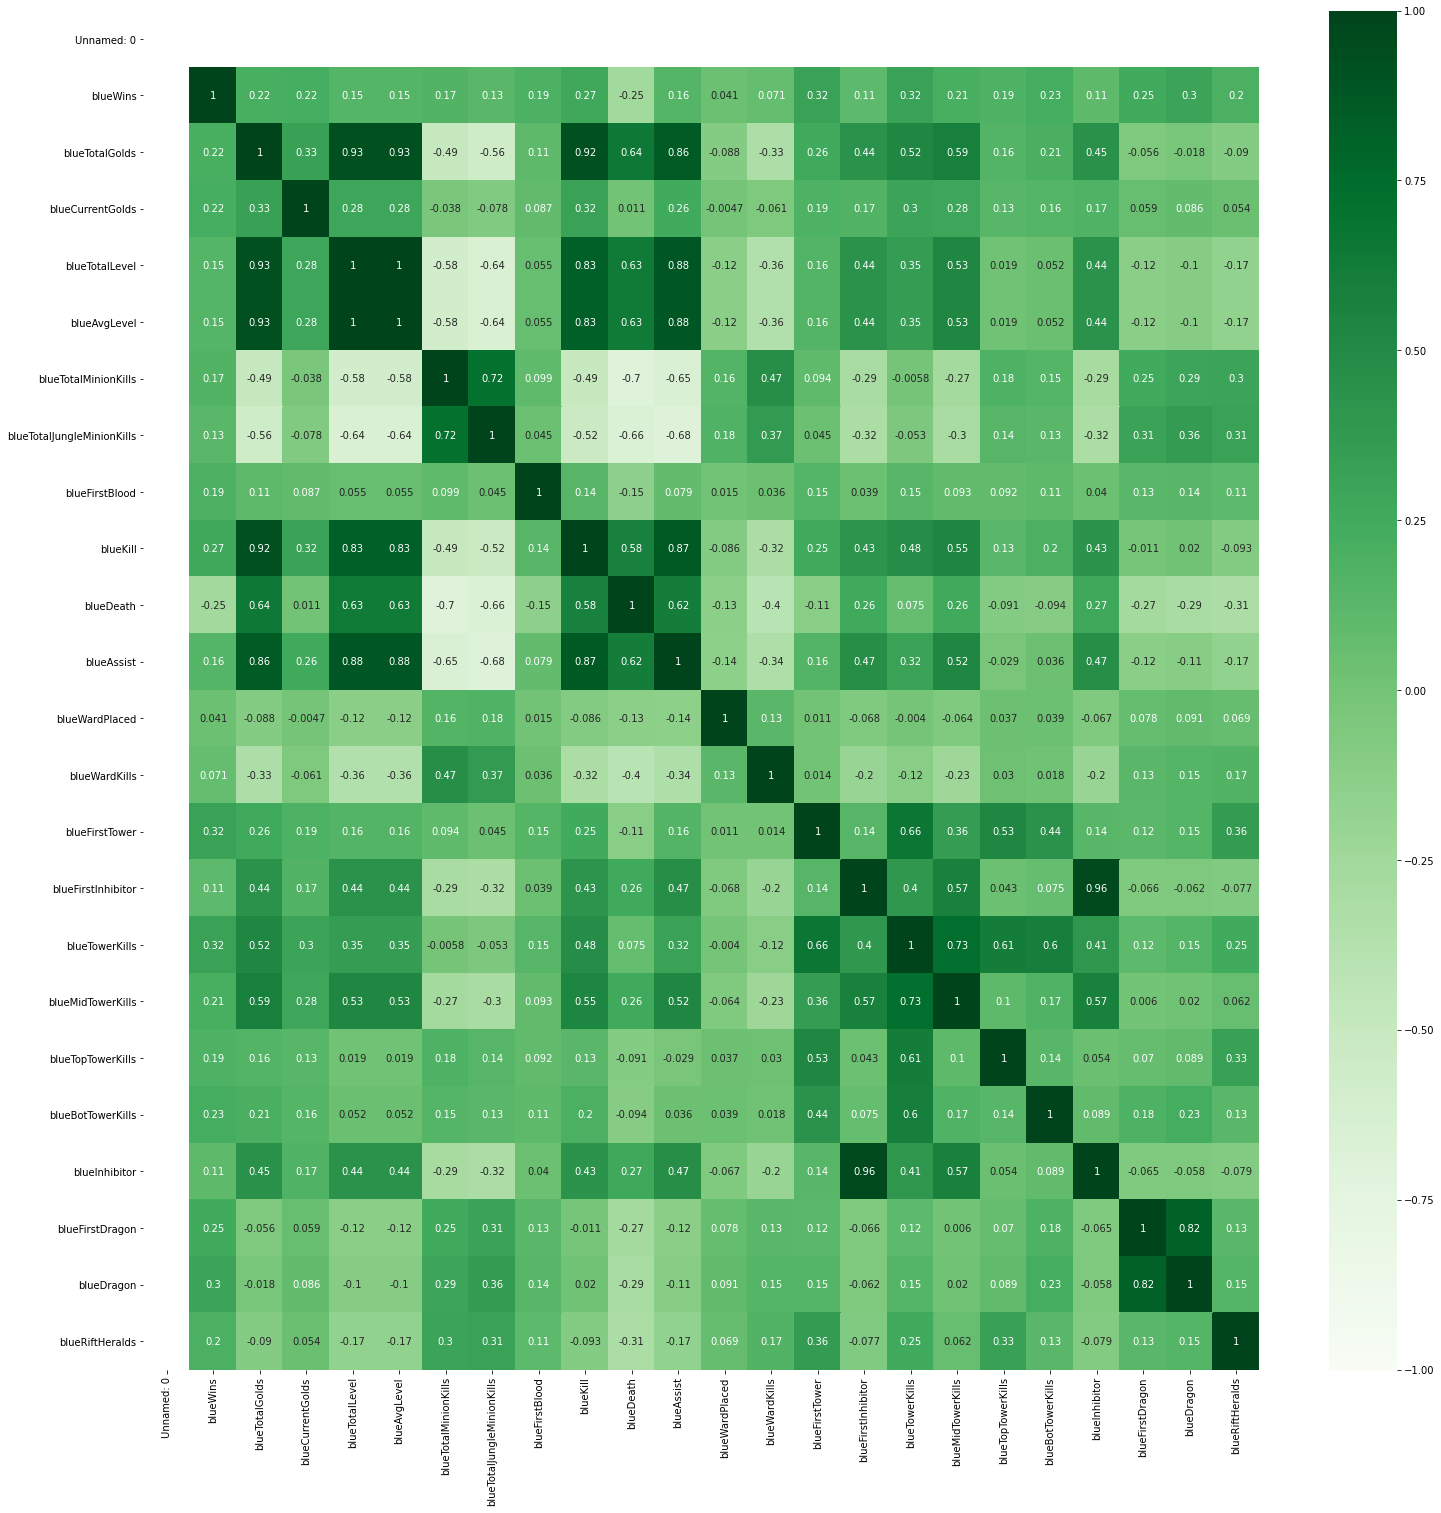

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

heat_df = blue_data.drop(['Unnamed: 0'], axis=1)

fig = plt.figure(figsize=(25, 25))
sns.heatmap(blue_data.corr(),
           annot = True,
           cmap = 'Greens',
           vmin = -1, vmax=1,)

## 데이터 전처리

비록 RIot api로 받아온 데이터를 한 번 전처리한 데이터지만 아직 모델에 쓰기엔 적합하지 않으므로 전처리 과정이 더 필요하다.
- gameId는 학습에 필요하지 않으므로 제거
- blueWin을 레이블로 사용한다.
    - blue팀 승리 : 1
    - red팀 승리 : 0
- 각 팀의 DragonType은 문자열로 처치한 용의 종류들을 작성해놓았기 때문에 학습에 사용할 수 없다 따라서 다음 column들을 추가한다.
    - {team}AirDragon
    - {team}EarthDragon
    - {team}FireDragon
    - {team}WaterDragon
- 각 팀의 처음 파괴한 포탑의 라인도 문자열로 주어졌기 때문에 어떤 라인의 타워를 먼저 파괴했는지 다음과 같이 column을 추가한다. 각 column이 1인경우 해당 라인의 포탑을 먼저 파괴한것이다.
    - {team}FirstTowerTop
    - {team}FirstTowerMid
    - {team}FirstTowerBot
    

In [9]:
# Blue 승리를 레이블로 사용 blue팀 승리 : 1, red팀 승리 : 0
df_y = df['blueWins']  
df_x = df.drop(['Unnamed: 0', 'blueWins', 'redWins'], axis=1)

### 1. 각 팀의 Dragon 타입을 숫자로 바꿔주기
- 각 팀이 잡은 드래곤의 종류가 string형태로 주어졌기 때문에 이를 숫자로 바꿔줘야한다.
- 드래곤 타입에 따라 0, 1, 2, 3과 같은 형태로 주게되면 종류마다 가중치가 주어지는 효과가 나타날 수 있으므로 각 용마다 column을 생성해서 해당 종류를 잡은 횟수를 기록한다.

In [10]:
#  각 팀의 Dragon 타입이 string으로 주어졌기 떄문에 column을 새로 만들어서 int형으로 만든다.
df['blueDragnoType'].unique()

array(['[]', "['EARTH_DRAGON']", "['WATER_DRAGON', 'AIR_DRAGON']",
       "['AIR_DRAGON']", "['FIRE_DRAGON', 'WATER_DRAGON']",
       "['WATER_DRAGON', 'EARTH_DRAGON']", "['WATER_DRAGON']",
       "['EARTH_DRAGON', 'FIRE_DRAGON']", "['FIRE_DRAGON']",
       "['AIR_DRAGON', 'WATER_DRAGON']", "['AIR_DRAGON', 'EARTH_DRAGON']",
       "['WATER_DRAGON', 'FIRE_DRAGON']",
       "['EARTH_DRAGON', 'WATER_DRAGON']",
       "['AIR_DRAGON', 'FIRE_DRAGON']", "['FIRE_DRAGON', 'AIR_DRAGON']",
       "['EARTH_DRAGON', 'AIR_DRAGON']",
       "['FIRE_DRAGON', 'EARTH_DRAGON']",
       "['AIR_DRAGON', 'EARTH_DRAGON', 'FIRE_DRAGON']",
       "['FIRE_DRAGON', 'WATER_DRAGON', 'EARTH_DRAGON']",
       "['WATER_DRAGON', 'FIRE_DRAGON', 'AIR_DRAGON']",
       "['AIR_DRAGON', 'EARTH_DRAGON', 'WATER_DRAGON']",
       "['WATER_DRAGON', 'EARTH_DRAGON', 'FIRE_DRAGON']",
       "['WATER_DRAGON', 'FIRE_DRAGON', 'EARTH_DRAGON', 'EARTH_DRAGON']",
       "['EARTH_DRAGON', 'FIRE_DRAGON', 'WATER_DRAGON']",
       "['EARTH_

In [11]:
# 잡은 용의 타입이 배열형태가 아닌 하나의 string 형태이기 때문에 토큰화 한 후 각 컬럼에 할당해줘야 한다.
import re

def preprocessing_dragon(df, team='blue'):
    # 각 팀의 용 종류별 잡은 횟수 column 추가
    df[f'{team}AirDragon'] = 0
    df[f'{team}EarthDragon'] = 0
    df[f'{team}FireDragon'] = 0
    df[f'{team}WaterDragon'] = 0
    
    for i, dragon in enumerate(df[f'{team}DragnoType']):
        dragonReg = re.sub('[\'\[\]]', '', dragon)
        for res in dragonReg.split(', '):
            if (res == 'AIR_DRAGON'):
                df[f'{team}AirDragon'][i] += 1
            elif (res == 'EARTH_DRAGON'):
                df[f'{team}EarthDragon'][i] += 1
            elif (res == 'FIRE_DRAGON'):
                df[f'{team}FireDragon'][i] += 1
            elif (res == 'WATER_DRAGON'):
                df[f'{team}WaterDragon'][i] += 1 
    return df.drop([f'{team}DragnoType'], axis=1)

### 2. 각 팀의 처음 파괴한 포탑의 라인을 숫자로 바꿔주기
- 드래곤과 마찬가지로 string형태로 주어졌다.
- Top, Mid, Bot에 각각 1, 2, 3을 주게 된다면 마찬가지로 가중치가 주어지는것과 같은 효과가 나타날 수 있으므로 각 라인에 대한 컬럼을 추가한다.

In [12]:
df['blueFirstTowerLane'].unique()

array(["['TOP_LANE']", '[]', "['MID_LANE']", "['BOT_LANE']"], dtype=object)

In [13]:
# 처음 파괴한 포탑에 대한 전처리
def preprocessing_tower(df, team='blue'):
    df[f'{team}FirstTowerTop'] = 0
    df[f'{team}FirstTowerMid'] = 0
    df[f'{team}FirstTowerBot'] = 0
    
    for i, lane in enumerate(df[f'{team}FirstTowerLane']):
        towerReg = re.sub('[\'\[\]]', '', lane)
        if (towerReg == 'TOP_LANE'):
            df[f'{team}FirstTowerTop'][i] = 1
        elif (towerReg == 'MID_LANE'):
            df[f'{team}FirstTowerMid'][i] = 1
        elif (towerReg == 'BOT_LANE'):
            df[f'{team}FirstTowerBot'][i] = 1
    return df.drop([f'{team}FirstTowerLane'], axis=1)

In [14]:
df_x = preprocessing_dragon(df_x, team='blue')
df_x = preprocessing_dragon(df_x, team='red')
df_x = preprocessing_tower(df_x, team='blue')
df_x = preprocessing_tower(df_x, team='red')

c:\program files (x86)\microsoft visual studio\shared\python37_64\lib\site-packages\ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
c:\program files (x86)\microsoft visual studio\shared\python37_64\lib\site-packages\ipykernel_launcher.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
c:\program files (x86)\microsoft visual studio\shared\python37_64\lib\site-packages\ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returnin

In [15]:
df_x.head(5)

,blueTotalGolds,blueCurrentGolds,blueTotalLevel,blueAvgLevel,blueTotalMinionKills,blueTotalJungleMinionKills,blueFirstBlood,blueKill,blueDeath,blueAssist,...,redAirDragon,redEarthDragon,redFireDragon,redWaterDragon,blueFirstTowerTop,blueFirstTowerMid,blueFirstTowerBot,redFirstTowerTop,redFirstTowerMid,redFirstTowerBot
0,23613,2713,42,8.4,398,101,1,1,8,3,...,1,0,0,0,1,0,0,0,0,0
1,23800,5315,45,9.0,417,78,0,4,6,4,...,1,0,0,0,0,0,0,0,0,0
2,25353,1933,45,9.0,333,90,0,12,6,18,...,0,0,0,0,0,0,0,1,0,0
3,29129,4804,47,9.4,341,80,1,19,3,22,...,0,0,0,0,0,1,0,0,0,0
4,25991,2915,46,9.2,327,62,1,11,7,13,...,0,0,0,0,0,0,0,0,0,1


### 특성 변경 후
특성의 개수가 77개가 되었다

In [203]:
df_x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64982 entries, 0 to 64981
Data columns (total 58 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   blueTotalGolds              64982 non-null  int64  
 1   blueCurrentGolds            64982 non-null  int64  
 2   blueTotalLevel              64982 non-null  int64  
 3   blueAvgLevel                64982 non-null  float64
 4   blueTotalMinionKills        64982 non-null  int64  
 5   blueTotalJungleMinionKills  64982 non-null  int64  
 6   blueFirstBlood              64982 non-null  int64  
 7   blueKill                    64982 non-null  int64  
 8   blueDeath                   64982 non-null  int64  
 9   blueAssist                  64982 non-null  int64  
 10  blueWardPlaced              64982 non-null  int64  
 11  blueWardKills               64982 non-null  int64  
 12  blueFirstTower              64982 non-null  int64  
 13  blueFirstInhibitor          649

## 데이터 분배
학습 데이터와 검증 데이터를 셔플 후 8:2로 나누겠다.

In [17]:
from sklearn.model_selection import train_test_split

train_x, test_x, train_y, test_y = train_test_split(df_x, df_y, test_size = 0.2, random_state=42)

### Feature scaling
- 원활한 학습을 위해 데이터를 작게 스케일링 해주자.
- 본 실험에선 Min Max Scaling을 사용하겠다.

In [18]:
from sklearn.preprocessing import MinMaxScaler

mms = MinMaxScaler()

In [19]:
mm_train_x = mms.fit_transform(train_x)
mm_test_x = mms.fit_transform(test_x)

## Model Building
데이터 처리는 끝났으니 이제 모델링을 해보자

## Case1 라인별 획득 골드, 경험치가 없는 경우

In [20]:
import tensorflow as tf
from keras.callbacks import ReduceLROnPlateau, EarlyStopping, TensorBoard
import tensorflow_addons as tfa  # for adamw

c:\program files (x86)\microsoft visual studio\shared\python37_64\lib\site-packages\requests\__init__.py:80: RequestsDependencyWarning: urllib3 (1.26.4) or chardet (3.0.4) doesn't match a supported version!
  RequestsDependencyWarning)


INFO:tensorflow:Enabling eager execution
INFO:tensorflow:Enabling v2 tensorshape
INFO:tensorflow:Enabling resource variables
INFO:tensorflow:Enabling tensor equality
INFO:tensorflow:Enabling control flow v2


C:\Users\ltw97\AppData\Roaming\Python\Python37\site-packages\tensorflow_addons\utils\ensure_tf_install.py:43: UserWarning: You are currently using a nightly version of TensorFlow (2.6.0-dev20210413). 
TensorFlow Addons offers no support for the nightly versions of TensorFlow. Some things might work, some other might not. 
If you encounter a bug, do not file an issue on GitHub.
  UserWarning,


In [21]:
num_features = train_x.shape[1]

model = tf.keras.Sequential([
    tf.keras.layers.Dense(256, input_shape=(1, num_features), activity_regularizer=tf.keras.regularizers.L2(0.03)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Activation(activation=tf.keras.layers.LeakyReLU(alpha=0.1)),
    tf.keras.layers.Dense(256, activity_regularizer=tf.keras.regularizers.L2(0.03)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Activation(activation=tf.keras.layers.LeakyReLU(alpha=0.1)),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [22]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1, 256)            15104     
_________________________________________________________________
batch_normalization (BatchNo (None, 1, 256)            1024      
_________________________________________________________________
activation (Activation)      (None, 1, 256)            0         
_________________________________________________________________
dense_1 (Dense)              (None, 1, 256)            65792     
_________________________________________________________________
batch_normalization_1 (Batch (None, 1, 256)            1024      
_________________________________________________________________
activation_1 (Activation)    (None, 1, 256)            0         
_________________________________________________________________
dense_2 (Dense)              (None, 1, 1)              2

In [23]:
# model 컴파일
model.compile(
    loss='binary_crossentropy',
    optimizer=tfa.optimizers.AdamW(weight_decay=1e-4),
    metrics=['accuracy']
)

In [25]:
# 모델 학습
import datetime

learning_rate_reduction = ReduceLROnPlateau(monitor='val_accuracy',
                                           patience=2,
                                           verbose=1,
                                           factor=0.25,
                                           min_lr=0.0000003)

early_stop = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=2)

log_dir = "logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)

history = model.fit(
    mm_train_x.reshape(-1, 1, num_features),
    train_y,
    epochs=10,
    batch_size=32,
    validation_data=(mm_test_x.reshape(-1, 1, num_features), test_y),
    callbacks=[learning_rate_reduction, tensorboard_callback],
)

Epoch 1/10
1625/1625 [==============================] - 15s 9ms/step - loss: 0.4794 - accuracy: 0.7766 - val_loss: 0.5283 - val_accuracy: 0.7560
Epoch 2/10
1625/1625 [==============================] - 14s 9ms/step - loss: 0.4712 - accuracy: 0.7756 - val_loss: 0.4970 - val_accuracy: 0.7601
Epoch 3/10
1625/1625 [==============================] - 14s 9ms/step - loss: 0.4678 - accuracy: 0.7758 - val_loss: 0.4917 - val_accuracy: 0.7583
Epoch 4/10
1625/1625 [==============================] - 14s 8ms/step - loss: 0.4636 - accuracy: 0.7794 - val_loss: 0.4797 - val_accuracy: 0.7670
Epoch 5/10
1625/1625 [==============================] - 14s 9ms/step - loss: 0.4630 - accuracy: 0.7787 - val_loss: 0.4765 - val_accuracy: 0.7626
Epoch 6/10
1625/1625 [==============================] - 14s 9ms/step - loss: 0.4620 - accuracy: 0.7765 - val_loss: 0.5007 - val_accuracy: 0.7489

Epoch 00006: ReduceLROnPlateau reducing learning rate to 0.0002500000118743628.
Epoch 7/10
1625/1625 [===========================

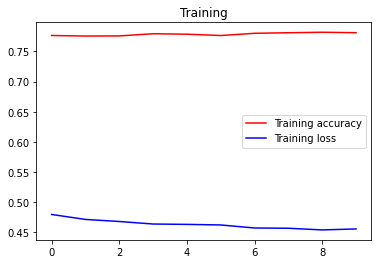

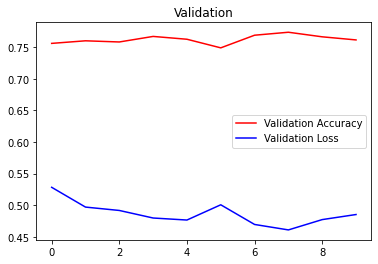

In [37]:
# 학습결과 시각화
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, loss, 'b', label='Training loss')
plt.title('Training')
plt.legend()
plt.figure()

plt.plot(epochs, val_acc, 'r', label='Validation Accuracy')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Validation')
plt.legend()

plt.show()

plt.close()

In [36]:
model.save('256_2layers.h5')

## 많은 레이어, 많은 유닛

In [27]:

model_many_layer = tf.keras.Sequential([
    tf.keras.layers.Dense(4096, input_shape=(1, num_features), activity_regularizer=tf.keras.regularizers.L2(0.03)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Activation(activation=tf.keras.layers.LeakyReLU(alpha=0.2)),
    tf.keras.layers.Dense(8192, activity_regularizer=tf.keras.regularizers.L2(0.03)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Activation(activation=tf.keras.layers.LeakyReLU(alpha=0.2)),
    tf.keras.layers.Dense(8192, activity_regularizer=tf.keras.regularizers.L2(0.03)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Activation(activation=tf.keras.layers.LeakyReLU(alpha=0.2)),
    tf.keras.layers.Dense(4096, activity_regularizer=tf.keras.regularizers.L2(0.03)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Activation(activation=tf.keras.layers.LeakyReLU(alpha=0.2)),
    tf.keras.layers.Dense(1024, activity_regularizer=tf.keras.regularizers.L2(0.03)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Activation(activation=tf.keras.layers.LeakyReLU(alpha=0.2)),
    tf.keras.layers.Dense(512, activity_regularizer=tf.keras.regularizers.L2(0.03)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Activation(activation=tf.keras.layers.LeakyReLU(alpha=0.2)),
    tf.keras.layers.Dense(128, activity_regularizer=tf.keras.regularizers.L2(0.03)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Activation(activation=tf.keras.layers.LeakyReLU(alpha=0.2)),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model_many_layer.compile(
    loss='binary_crossentropy',
    optimizer=tfa.optimizers.AdamW(weight_decay=1e-4), 
    metrics=['accuracy'],
)

history_many_layer = model_many_layer.fit(
    mm_train_x.reshape(-1, 1, num_features),
    train_y,
    epochs=10, 
    batch_size=32,
    validation_data=(mm_test_x.reshape(-1, 1, num_features), test_y),
    callbacks=[learning_rate_reduction],
)

Epoch 1/10
1625/1625 [==============================] - 91s 55ms/step - loss: 106.6073 - accuracy: 0.6245 - val_loss: 62.8904 - val_accuracy: 0.7128
Epoch 2/10
1625/1625 [==============================] - 92s 56ms/step - loss: 1.2813 - accuracy: 0.7026 - val_loss: 1.6030 - val_accuracy: 0.6167
Epoch 3/10
1625/1625 [==============================] - 92s 57ms/step - loss: 0.6020 - accuracy: 0.7459 - val_loss: 0.6294 - val_accuracy: 0.7232
Epoch 4/10
1625/1625 [==============================] - 93s 57ms/step - loss: 0.5313 - accuracy: 0.7553 - val_loss: 1.5120 - val_accuracy: 0.5654
Epoch 5/10
1625/1625 [==============================] - 89s 55ms/step - loss: 0.5163 - accuracy: 0.7614 - val_loss: 0.5222 - val_accuracy: 0.7767
Epoch 6/10
1625/1625 [==============================] - 89s 55ms/step - loss: 0.4757 - accuracy: 0.7777 - val_loss: 0.5008 - val_accuracy: 0.7569
Epoch 7/10
1625/1625 [==============================] - 90s 55ms/step - loss: 0.4685 - accuracy: 0.7756 - val_loss: 0.898

In [35]:
model_many_layer.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 1, 4096)           241664    
_________________________________________________________________
batch_normalization_2 (Batch (None, 1, 4096)           16384     
_________________________________________________________________
activation_2 (Activation)    (None, 1, 4096)           0         
_________________________________________________________________
dense_4 (Dense)              (None, 1, 8192)           33562624  
_________________________________________________________________
batch_normalization_3 (Batch (None, 1, 8192)           32768     
_________________________________________________________________
activation_3 (Activation)    (None, 1, 8192)           0         
_________________________________________________________________
dense_5 (Dense)              (None, 1, 8192)          

In [32]:
model_many_layer.save('large-units_many_layers.h5')

In [ ]:
num_features = train_x.shape[1]

model = tf.keras.Sequential([
    tf.keras.layers.Dense(256, input_shape=(1, num_features), activity_regularizer=tf.keras.regularizers.L2(0.03)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Activation(activation=tf.keras.layers.LeakyReLU(alpha=0.1)),
    tf.keras.layers.Dense(256, activity_regularizer=tf.keras.regularizers.L2(0.03)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Activation(activation=tf.keras.layers.LeakyReLU(alpha=0.1)),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [ ]:
model.summary()

In [ ]:
# model 컴파일
model.compile(
    loss='binary_crossentropy',
    optimizer=tfa.optimizers.AdamW(weight_decay=1e-4),
    metrics=['accuracy']
)

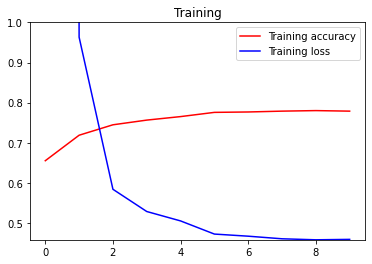

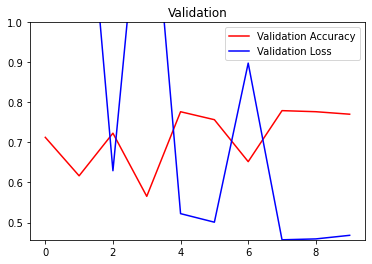

In [34]:
# 학습결과 시각화
import matplotlib.pyplot as plt

acc = history_many_layer.history['accuracy']
val_acc = history_many_layer.history['val_accuracy']
loss = history_many_layer.history['loss']
val_loss = history_many_layer.history['val_loss']

epochs = range(len(acc))

plt.ylim(min(loss), min(max(loss), 1))
plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, loss, 'b', label='Training loss')
plt.title('Training')
plt.legend()
plt.figure()

plt.ylim(min(val_loss), min(max(val_loss), 1))
plt.plot(epochs, val_acc, 'r', label='Validation Accuracy')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Validation')
plt.legend()

plt.show()

plt.close()

In [ ]:
# 모델 학습
import datetime

learning_rate_reduction = ReduceLROnPlateau(monitor='val_accuracy',
                                           patience=2,
                                           verbose=1,
                                           factor=0.25,
                                           min_lr=0.0000003)

early_stop = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=2)

history = model.fit(
    mm_train_x.reshape(-1, 1, num_features),
    train_y,
    epochs=10,
    batch_size=32,
    validation_data=(mm_test_x.reshape(-1, 1, num_features), test_y),
    callbacks=[learning_rate_reduction, tensorboard_callback],
)

## Case2 라인별 데이터추가
- 각 팀의 라인별 획득 골드, 획득 경험치 데이터를 추가한 상태에서 동일한 모델로 학습을 시켜본다.

In [38]:
df2 = pd.read_csv('./lolmaster.csv')

In [39]:
df2.head(5)

,Unnamed: 0,gameId,blueWins,blueTotalGolds,blueCurrentGolds,blueTotalLevel,blueAvgLevel,blueTotalMinionKills,blueTotalJungleMinionKills,blueFirstBlood,...,redTopGold,redMidGold,redJugGold,redSupGold,redAdGold,redTopXp,redMidXp,redJugXp,redSupXp,redAdXp
0,0,4227123625,0,23613,2713,42,8.4,398,101,1,...,4950,4862,4249,3279,5416,6778,6715,4448,4317,4698
1,0,4219545724,0,23800,5315,45,9.0,417,78,0,...,5017,3990,4407,3261,5288,7356,6698,4826,3860,5416
2,0,4219463634,1,25353,1933,45,9.0,333,90,0,...,5344,4758,5156,3593,4623,6578,6071,3795,2921,4998
3,0,4205778093,1,29129,4804,47,9.4,341,80,1,...,3224,4104,3719,3127,4722,4007,5597,4012,3273,4183
4,0,4201063474,0,25991,2915,46,9.2,327,62,1,...,4938,4909,4535,2756,4798,7278,7023,5819,3293,4770


In [205]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64982 entries, 0 to 64981
Data columns (total 72 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Unnamed: 0                  64982 non-null  int64  
 1   gameId                      64982 non-null  int64  
 2   blueWins                    64982 non-null  int64  
 3   blueTotalGolds              64982 non-null  int64  
 4   blueCurrentGolds            64982 non-null  int64  
 5   blueTotalLevel              64982 non-null  int64  
 6   blueAvgLevel                64982 non-null  float64
 7   blueTotalMinionKills        64982 non-null  int64  
 8   blueTotalJungleMinionKills  64982 non-null  int64  
 9   blueFirstBlood              64982 non-null  int64  
 10  blueKill                    64982 non-null  int64  
 11  blueDeath                   64982 non-null  int64  
 12  blueAssist                  64982 non-null  int64  
 13  blueWardPlaced              649

In [40]:
# Blue 승리를 레이블로 사용 blue팀 승리 : 1, red팀 승리 : 0
df2_y = df2['blueWins']  
df2_x = df2.drop(['Unnamed: 0', 'blueWins', 'redWins'], axis=1)

In [41]:
df2_x = preprocessing_dragon(df2_x, team='blue')
df2_x = preprocessing_dragon(df2_x, team='red')
df2_x = preprocessing_tower(df2_x, team='blue')
df2_x = preprocessing_tower(df2_x, team='red')

c:\program files (x86)\microsoft visual studio\shared\python37_64\lib\site-packages\ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
c:\program files (x86)\microsoft visual studio\shared\python37_64\lib\site-packages\ipykernel_launcher.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
c:\program files (x86)\microsoft visual studio\shared\python37_64\lib\site-packages\ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returnin

In [42]:
from sklearn.model_selection import train_test_split

train_x2, test_x2, train_y2, test_y2 = train_test_split(df2_x, df2_y, test_size = 0.2, random_state=42)

In [43]:
mm_train_x2 = mms.fit_transform(train_x2)
mm_test_x2 = mms.fit_transform(test_x2)

## 256 Dense층 2개

In [44]:
num_features = train_x2.shape[1]

model2 = tf.keras.Sequential([
    tf.keras.layers.Dense(256, input_shape=(1, num_features), activity_regularizer=tf.keras.regularizers.L2(0.03)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Activation(activation=tf.keras.layers.LeakyReLU(alpha=0.1)),
    tf.keras.layers.Dense(256, activity_regularizer=tf.keras.regularizers.L2(0.03)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Activation(activation=tf.keras.layers.LeakyReLU(alpha=0.1)),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# model 컴파일
model2.compile(
    loss='binary_crossentropy',
    optimizer=tfa.optimizers.AdamW(weight_decay=1e-4),
    metrics=['accuracy']
)

model2.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_11 (Dense)             (None, 1, 256)            20480     
_________________________________________________________________
batch_normalization_9 (Batch (None, 1, 256)            1024      
_________________________________________________________________
activation_9 (Activation)    (None, 1, 256)            0         
_________________________________________________________________
dense_12 (Dense)             (None, 1, 256)            65792     
_________________________________________________________________
batch_normalization_10 (Batc (None, 1, 256)            1024      
_________________________________________________________________
activation_10 (Activation)   (None, 1, 256)            0         
_________________________________________________________________
dense_13 (Dense)             (None, 1, 1)             

In [45]:
history2 = model2.fit(
    mm_train_x2.reshape(-1, 1, num_features),
    train_y,
    epochs=10,
    batch_size=32,
    validation_data=(mm_test_x2.reshape(-1, 1, num_features), test_y2),
    callbacks=[learning_rate_reduction],
)

Epoch 1/10
1625/1625 [==============================] - 17s 10ms/step - loss: 1.0095 - accuracy: 0.7415 - val_loss: 0.5726 - val_accuracy: 0.7700
Epoch 2/10
1625/1625 [==============================] - 17s 11ms/step - loss: 0.5214 - accuracy: 0.7727 - val_loss: 0.4991 - val_accuracy: 0.7694
Epoch 3/10
1625/1625 [==============================] - 14s 9ms/step - loss: 0.4769 - accuracy: 0.7761 - val_loss: 0.4608 - val_accuracy: 0.7850
Epoch 4/10
1625/1625 [==============================] - 18s 11ms/step - loss: 0.4734 - accuracy: 0.7764 - val_loss: 0.4804 - val_accuracy: 0.7621
Epoch 5/10
1625/1625 [==============================] - 20s 12ms/step - loss: 0.4628 - accuracy: 0.7833 - val_loss: 0.4611 - val_accuracy: 0.7760

Epoch 00005: ReduceLROnPlateau reducing learning rate to 0.0002500000118743628.
Epoch 6/10
1625/1625 [==============================] - 18s 11ms/step - loss: 0.4515 - accuracy: 0.7852 - val_loss: 0.4421 - val_accuracy: 0.7873
Epoch 7/10
1625/1625 [======================

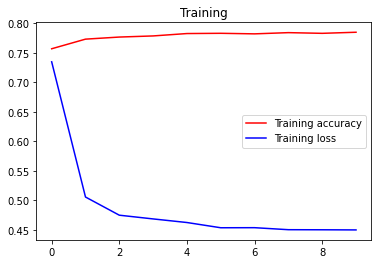

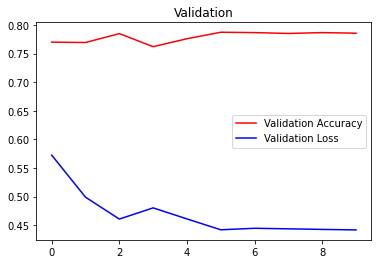

In [47]:
acc = history2.history['accuracy']
val_acc = history2.history['val_accuracy']
loss = history2.history['loss']
val_loss = history2.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, loss, 'b', label='Training loss')
plt.title('Training')
plt.legend()
plt.figure()

plt.plot(epochs, val_acc, 'r', label='Validation Accuracy')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Validation')
plt.legend()

plt.show()

plt.close()

In [48]:
model2.save('256_2layers_with_more_feature.h5')

## 많은 유닛, 많은 레이어

In [49]:
model2_many_layer = tf.keras.Sequential([
    tf.keras.layers.Dense(4096, input_shape=(1, num_features), activity_regularizer=tf.keras.regularizers.L2(0.03)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Activation(activation=tf.keras.layers.LeakyReLU(alpha=0.2)),
    tf.keras.layers.Dense(8192, activity_regularizer=tf.keras.regularizers.L2(0.03)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Activation(activation=tf.keras.layers.LeakyReLU(alpha=0.2)),
    tf.keras.layers.Dense(8192, activity_regularizer=tf.keras.regularizers.L2(0.03)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Activation(activation=tf.keras.layers.LeakyReLU(alpha=0.2)),
    tf.keras.layers.Dense(4096, activity_regularizer=tf.keras.regularizers.L2(0.03)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Activation(activation=tf.keras.layers.LeakyReLU(alpha=0.2)),
    tf.keras.layers.Dense(1024, activity_regularizer=tf.keras.regularizers.L2(0.03)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Activation(activation=tf.keras.layers.LeakyReLU(alpha=0.2)),
    tf.keras.layers.Dense(512, activity_regularizer=tf.keras.regularizers.L2(0.03)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Activation(activation=tf.keras.layers.LeakyReLU(alpha=0.2)),
    tf.keras.layers.Dense(128, activity_regularizer=tf.keras.regularizers.L2(0.03)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Activation(activation=tf.keras.layers.LeakyReLU(alpha=0.2)),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model2_many_layer.compile(
    loss='binary_crossentropy',
    optimizer=tfa.optimizers.AdamW(weight_decay=1e-4), 
    metrics=['accuracy'],
)

model2_many_layer.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_14 (Dense)             (None, 1, 4096)           327680    
_________________________________________________________________
batch_normalization_11 (Batc (None, 1, 4096)           16384     
_________________________________________________________________
activation_11 (Activation)   (None, 1, 4096)           0         
_________________________________________________________________
dense_15 (Dense)             (None, 1, 8192)           33562624  
_________________________________________________________________
batch_normalization_12 (Batc (None, 1, 8192)           32768     
_________________________________________________________________
activation_12 (Activation)   (None, 1, 8192)           0         
_________________________________________________________________
dense_16 (Dense)             (None, 1, 8192)          

In [50]:
history2_many_layer = model2_many_layer.fit(
    mm_train_x2.reshape(-1, 1, num_features),
    train_y,
    epochs=10, 
    batch_size=32,
    validation_data=(mm_test_x2.reshape(-1, 1, num_features), test_y2),
    callbacks=[learning_rate_reduction],
)

Epoch 1/10
1625/1625 [==============================] - 90s 53ms/step - loss: 111.6439 - accuracy: 0.6184 - val_loss: 139.0586 - val_accuracy: 0.6935
Epoch 2/10
1625/1625 [==============================] - 88s 54ms/step - loss: 1.7036 - accuracy: 0.7132 - val_loss: 1.2542 - val_accuracy: 0.7402
Epoch 3/10
1625/1625 [==============================] - 90s 55ms/step - loss: 0.5785 - accuracy: 0.7508 - val_loss: 0.6850 - val_accuracy: 0.6882
Epoch 4/10
1625/1625 [==============================] - 94s 58ms/step - loss: 0.5316 - accuracy: 0.7605 - val_loss: 0.5367 - val_accuracy: 0.7450
Epoch 5/10
1625/1625 [==============================] - 90s 55ms/step - loss: 0.5017 - accuracy: 0.7687 - val_loss: 0.4905 - val_accuracy: 0.7686
Epoch 6/10
1625/1625 [==============================] - 95s 58ms/step - loss: 0.4789 - accuracy: 0.7730 - val_loss: 0.4548 - val_accuracy: 0.7824
Epoch 7/10
1625/1625 [==============================] - 87s 54ms/step - loss: 0.4598 - accuracy: 0.7810 - val_loss: 0.47

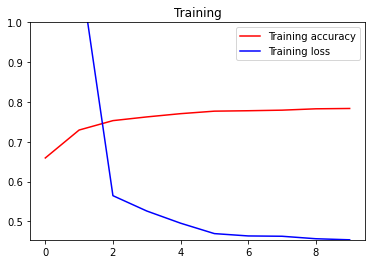

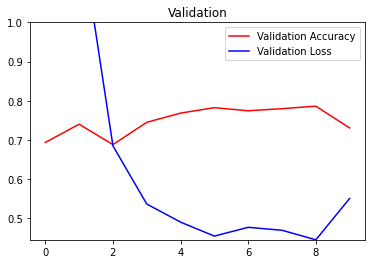

In [52]:
# 학습결과 시각화
import matplotlib.pyplot as plt

acc = history2_many_layer.history['accuracy']
val_acc = history2_many_layer.history['val_accuracy']
loss = history2_many_layer.history['loss']
val_loss = history2_many_layer.history['val_loss']

epochs = range(len(acc))

plt.ylim(min(loss), min(max(loss), 1))
plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, loss, 'b', label='Training loss')
plt.title('Training')
plt.legend()
plt.figure()

plt.ylim(min(val_loss), min(max(val_loss), 1))
plt.plot(epochs, val_acc, 'r', label='Validation Accuracy')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Validation')
plt.legend()

plt.show()

plt.close()

In [53]:
model2_many_layer.save('many_layer_with_more_feature.h5')

## 라인별 데이터 유무 비교

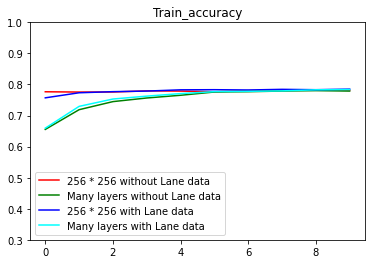

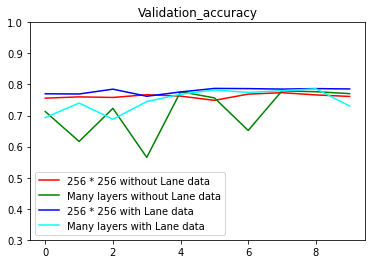

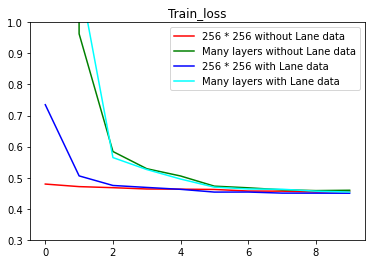

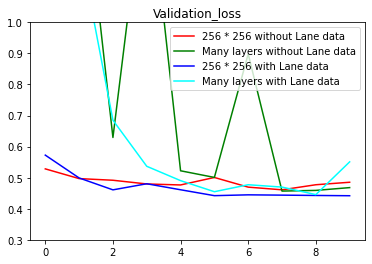

<Figure size 432x288 with 0 Axes>

In [57]:
# 학습결과 시각화
epochs = range(len(acc))

plt.ylim(0.3, 1)
plt.plot(epochs, history.history['accuracy'], 'red', label='256 * 256 without Lane data')
plt.plot(epochs, history_many_layer.history['accuracy'], 'green', label='Many layers without Lane data')
plt.plot(epochs, history2.history['accuracy'], 'blue', label='256 * 256 with Lane data')
plt.plot(epochs, history2_many_layer.history['accuracy'], 'aqua', label='Many layers with Lane data')
plt.title('Train_accuracy')
plt.legend()
plt.figure()

plt.ylim(0.3, 1)
plt.plot(epochs, history.history['val_accuracy'], 'red', label='256 * 256 without Lane data')
plt.plot(epochs, history_many_layer.history['val_accuracy'], 'green', label='Many layers without Lane data')
plt.plot(epochs, history2.history['val_accuracy'], 'blue', label='256 * 256 with Lane data')
plt.plot(epochs, history2_many_layer.history['val_accuracy'], 'aqua', label='Many layers with Lane data')
plt.title('Validation_accuracy')
plt.legend()
plt.figure()

plt.ylim(0.3, 1)
plt.plot(epochs, history.history['loss'], 'red', label='256 * 256 without Lane data')
plt.plot(epochs, history_many_layer.history['loss'], 'green', label='Many layers without Lane data')
plt.plot(epochs, history2.history['loss'], 'blue', label='256 * 256 with Lane data')
plt.plot(epochs, history2_many_layer.history['loss'], 'aqua', label='Many layers with Lane data')
plt.title('Train_loss')
plt.legend()
plt.figure()

plt.ylim(0.3, 1)
plt.plot(epochs, history.history['val_loss'], 'red', label='256 * 256 without Lane data')
plt.plot(epochs, history_many_layer.history['val_loss'], 'green', label='Many layers without Lane data')
plt.plot(epochs, history2.history['val_loss'], 'blue', label='256 * 256 with Lane data')
plt.plot(epochs, history2_many_layer.history['val_loss'], 'aqua', label='Many layers with Lane data')
plt.title('Validation_loss')
plt.legend()
plt.figure()

plt.show()

plt.close()

## 데이터간, 모델간 Best 비교

In [74]:
cmp = pd.DataFrame([[.0, .0, .0, .0], [.0, .0, .0, .0], [.0, .0, .0, .0], [.0, .0, .0, .0]], columns=[0, 0, 0, 0], index=[0, 0, 0, 0], dtype=float)

In [75]:
cmp.columns = ["Train Acc", "Train Loss", "Validation Acc", "Validation Loss"]
cmp.index = ["256 * 256 without Lane Data", "Many layers without Lane Data", "256 * 256 with Lane Data", "Many layers with Lane Data"]

In [78]:
cmp.loc["256 * 256 without Lane Data"]['Train Acc'] = max(history.history['accuracy'])
cmp.loc["256 * 256 without Lane Data"]['Train Loss'] = min(history.history['loss'])
cmp.loc["256 * 256 without Lane Data"]['Validation Acc'] = max(history.history['val_accuracy'])
cmp.loc["256 * 256 without Lane Data"]['Validation Loss'] = min(history.history['val_loss'])

cmp.loc["Many layers without Lane Data"]['Train Acc'] = max(history_many_layer.history['accuracy'])
cmp.loc["Many layers without Lane Data"]['Train Loss'] = min(history_many_layer.history['loss'])
cmp.loc["Many layers without Lane Data"]['Validation Acc'] = max(history_many_layer.history['val_accuracy'])
cmp.loc["Many layers without Lane Data"]['Validation Loss'] = min(history_many_layer.history['val_loss'])

cmp.loc["256 * 256 with Lane Data"]['Train Acc'] = max(history2.history['accuracy'])
cmp.loc["256 * 256 with Lane Data"]['Train Loss'] = min(history2.history['loss'])
cmp.loc["256 * 256 with Lane Data"]['Validation Acc'] = max(history2.history['val_accuracy'])
cmp.loc["256 * 256 with Lane Data"]['Validation Loss'] = min(history2.history['val_loss'])

cmp.loc["Many layers with Lane Data"]['Train Acc'] = max(history2_many_layer.history['accuracy'])
cmp.loc["Many layers with Lane Data"]['Train Loss'] = min(history2_many_layer.history['loss'])
cmp.loc["Many layers with Lane Data"]['Validation Acc'] = max(history2_many_layer.history['val_accuracy'])
cmp.loc["Many layers with Lane Data"]['Validation Loss'] = min(history2_many_layer.history['val_loss'])


In [79]:
cmp

,Train Acc,Train Loss,Validation Acc,Validation Loss
256 * 256 without Lane Data,0.781937,0.453811,0.773640,0.460916
Many layers without Lane Data,0.780206,0.458402,0.779488,0.456830
256 * 256 with Lane Data,0.785034,0.449946,0.787336,0.441871
Many layers with Lane Data,0.783707,0.453890,0.786181,0.445400


# 게임이 끝난 후 데이터와 비교

In [141]:
df_fin = pd.read_csv('Master_Ranked_Games.csv')
df_new = pd.DataFrame(columns=df_fin.columns)

In [142]:
from tqdm import tqdm, trange

progress = 0

for i in tqdm(df['gameId']):
    # print(f'gameid : {progress / df.shape[0]}%')
    df_new = df_new.append(df_fin[df_fin['gameId'] == i])
    

100%|█████████████████████████████████████████████████████████████████████████████| 64982/64982 [1:11:35<00:00, 15.13it/s]


In [146]:
df_new.to_csv('./masterfin.csv', encoding='utf-8')

In [157]:
df_new

,gameDuraton,blueWins,blueFirstBlood,blueFirstTower,blueFirstBaron,blueFirstDragon,blueFirstInhibitor,blueDragonKills,blueBaronKills,blueTowerKills,...,redAssist,redChampionDamageDealt,redTotalGold,redTotalMinionKills,redTotalLevel,redAvgLevel,redJungleMinionKills,redKillingSpree,redTotalHeal,redObjectDamageDealt
0,1429,0,1,1,0,0,0,0,0,4,...,45,53831,41991,609,64,12.8,127,4,12916,26338
1,1313,0,0,1,0,0,0,0,0,3,...,43,52924,39672,510,63,12.6,133,4,12252,29828
2,1660,1,0,0,1,1,1,1,1,9,...,22,61745,46516,630,65,13.0,153,2,17005,37066
3,984,1,1,1,0,1,0,2,0,5,...,5,25007,21444,304,41,8.2,51,1,10499,3085
4,1437,0,1,1,0,1,0,2,0,3,...,39,71794,45798,565,68,13.6,150,7,47523,47150
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69420,1499,1,0,1,1,0,1,1,1,8,...,17,46630,42976,608,60,12.0,113,3,16704,28075
69421,1464,1,1,0,0,0,0,0,0,4,...,117,159034,73133,280,90,18.0,0,14,55639,8761
69422,1793,0,0,0,0,0,0,1,0,1,...,62,106380,60107,519,78,15.6,155,11,55982,94929
69423,915,0,1,0,0,0,0,0,0,0,...,14,28287,29603,357,49,9.8,96,2,18864,24513


In [154]:
df_new

,gameDuraton,blueWins,blueFirstBlood,blueFirstTower,blueFirstBaron,blueFirstDragon,blueFirstInhibitor,blueDragonKills,blueBaronKills,blueTowerKills,...,redAssist,redChampionDamageDealt,redTotalGold,redTotalMinionKills,redTotalLevel,redAvgLevel,redJungleMinionKills,redKillingSpree,redTotalHeal,redObjectDamageDealt
0,1429,0,1,1,0,0,0,0,0,4,...,45,53831,41991,609,64,12.8,127,4,12916,26338
1,1313,0,0,1,0,0,0,0,0,3,...,43,52924,39672,510,63,12.6,133,4,12252,29828
2,1660,1,0,0,1,1,1,1,1,9,...,22,61745,46516,630,65,13.0,153,2,17005,37066
3,984,1,1,1,0,1,0,2,0,5,...,5,25007,21444,304,41,8.2,51,1,10499,3085
4,1437,0,1,1,0,1,0,2,0,3,...,39,71794,45798,565,68,13.6,150,7,47523,47150
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69420,1499,1,0,1,1,0,1,1,1,8,...,17,46630,42976,608,60,12.0,113,3,16704,28075
69421,1464,1,1,0,0,0,0,0,0,4,...,117,159034,73133,280,90,18.0,0,14,55639,8761
69422,1793,0,0,0,0,0,0,1,0,1,...,62,106380,60107,519,78,15.6,155,11,55982,94929
69423,915,0,1,0,0,0,0,0,0,0,...,14,28287,29603,357,49,9.8,96,2,18864,24513


In [160]:
df_new_x = df_new.drop(['blueWins', 'redWins'], axis=1)
df_new_y = df_new['blueWins']

In [199]:
train_x_fin, test_x_fin, train_y_fin, test_y_fin = train_test_split(df_new_x, df_new_y, test_size = 0.2, random_state=42)

In [200]:
mms_train_x_fin = mms.fit_transform(train_x_fin)
mms_test_x_fin = mms.fit_transform(test_x_fin)

In [201]:
num_features2 = train_x_fin.shape[1]

model_fin = tf.keras.Sequential([
    tf.keras.layers.Dense(256, input_shape=(1, num_features2), activity_regularizer=tf.keras.regularizers.L2(0.03)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Activation(activation=tf.keras.layers.LeakyReLU(alpha=0.1)),
    tf.keras.layers.Dense(256, activity_regularizer=tf.keras.regularizers.L2(0.03)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Activation(activation=tf.keras.layers.LeakyReLU(alpha=0.1)),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# model 컴파일
model_fin.compile(
    loss='binary_crossentropy',
    optimizer=tfa.optimizers.AdamW(weight_decay=1e-4),
    metrics=['accuracy']
)

model_fin.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_28 (Dense)             (None, 1, 256)            12288     
_________________________________________________________________
batch_normalization_22 (Batc (None, 1, 256)            1024      
_________________________________________________________________
activation_22 (Activation)   (None, 1, 256)            0         
_________________________________________________________________
dense_29 (Dense)             (None, 1, 256)            65792     
_________________________________________________________________
batch_normalization_23 (Batc (None, 1, 256)            1024      
_________________________________________________________________
activation_23 (Activation)   (None, 1, 256)            0         
_________________________________________________________________
dense_30 (Dense)             (None, 1, 1)             

In [204]:
history_fin = model_fin.fit(
    mms_train_x_fin.reshape(-1, 1, num_features2),
    train_y_fin,
    epochs=10, 
    batch_size=32,
    validation_data=(mms_test_x_fin.reshape(-1, 1, num_features2), test_y_fin),
    callbacks=[learning_rate_reduction],
)

ValueError: Failed to convert a NumPy array to a Tensor (Unsupported object type int).